<a href="https://colab.research.google.com/github/vivekam101/Bert-Internals/blob/main/Explore_XLM_R_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Model


Install the huggingface implementation.

In [37]:
!pip install transformers

In [38]:
import torch
from transformers import XLMRobertaTokenizer

# Download the tokenizer for the XLM-Robert `base` model.
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )

## Inspect XLM-R Vocabulary
--------------------------

### Vocab Dump
--------------

Retrieve the entire list of "tokens" and write these out to a text file so we can peruse them.

In [39]:
# Retrieve the full list of tokens.
all_tokens = list(tokenizer.get_vocab().keys())

print('The vocabulary contains {:,} tokens.'.format(len(all_tokens)))

The vocabulary contains 250,002 tokens.


In [40]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in all_tokens:
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')


You can now open the 'vocabulary.txt' file using the file system navigator in the sidebar of this Colab Notebook.

### SentencePiece vs. WordPiece
------------------------------

XLM-R uses a SentencePiece model, which is a little different than BERT's WordPiece model.

As an example, I'll use a misspelling of the word "philosophy": "philosphy". This will cause the tokenizer to break the word into subwords.

In WordPiece, subwords are denoted by two hash characters, except the *first* subword in a word. 

```
 BERT /     WordPiece:  phil  ##os  ##phy
XLM-R / SentencePiece:	▁phil   os    phy
```

In SentencePiece, all spacing is captured.

> Note: The marking character used by SentencePiece looks like an underscore, but it as actually unicode symbol U+2581, named "Lower One Eighth Block". I'll refer to it as an underscore for simplicity, though.
* Underscore: _
* U+2581: ▁

With SentencePiece, you can interpret the underscore as a space, because that's exactly what it represents! 




Let's import the standard BERT tokenizer to compare the two.

In [41]:
from transformers import BertTokenizer

# Download the tokenizer for the XLM-Robert `base` model.
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Now we can tokenize an example sentence and compare the tokens.

In [42]:
example_sentence = 'The XLM-R model has many word embeddings.'

# Tokenize with SentencePiece
xlmr_tokens = tokenizer.tokenize(example_sentence)

# Tokenize with WordPiece
bert_tokens = bert_tokenizer.tokenize(example_sentence)

Helper function to print them side by side.

In [43]:
def print_as_rows(list_a, list_b):
    '''
    Prints two lists as rows, with padding to make them line up neatly.
    '''
    row_a = ""
    row_b = ""

    # Pad the lists to the same length.
    while len(list_a) < len(list_b):
        list_a.append("")
    while len(list_b) < len(list_a):
        list_b.append("")
    
    for i in range(0, len(list_a)):
        str_a = list_a[i]
        str_b = list_b[i]

        pad_len = max(len(str_a), len(str_b)) + 2
    
        row_a += ("{:>{width}}").format(str_a, width=pad_len)
        row_b += ("{:>{width}}").format(str_b, width=pad_len)
    
    print(row_a)
    print(row_b)


In [44]:
print_as_rows(xlmr_tokens, bert_tokens)

  ▁The  ▁XL     M  -  R  ▁model  ▁has  ▁many  ▁word   ▁   embe   dding    s  .
   The    X  ##LM  -  R   model   has   many   word  em  ##bed  ##ding  ##s  .


```
  ▁The  ▁XL     M  -  R  ▁model  ▁has  ▁many  ▁word   ▁   embe   dding    s  .
   The    X  ##LM  -  R   model   has   many   word  em  ##bed  ##ding  ##s  .
```

In [45]:
#print("'" + '\'  \''.join(xlmr_tokens) + "'")
print('XLM-R:  ' + '  '.join(xlmr_tokens))
print(' BERT:  ' + '  '.join(bert_tokens))

XLM-R:  ▁The  ▁XL  M  -  R  ▁model  ▁has  ▁many  ▁word  ▁  embe  dding  s  .
 BERT:  The  X  ##LM  -  R  model  has  many  word  em  ##bed  ##ding  ##s  .


In [46]:
import pandas as pd

pd.DataFrame([xlmr_tokens, bert_tokens])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,▁The,▁XL,M,-,R,▁model,▁has,▁many,▁word,▁,embe,dding,s,.
1,The,X,##LM,-,R,model,has,many,word,em,##bed,##ding,##s,.


### Single Characters
---------------------

The following code prints out all of the single character tokens in the vocabulary. Because these are not preceded by an underscore, these are only tokens which get combined with other tokens and not standalone words. 

The following cell iterates over the vocabulary, pulling out all of the single character tokens and adding them to a list named `one_chars`.

In [47]:
one_chars = []

# For each token in the vocabulary...
for token in all_tokens:
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    

This cell then prints out all of these characters--40 per line, and each separated by a space.

In [48]:
print('Number of single character tokens: {:,}\n'.format(len(one_chars)))

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 13,828

, . ▁ s - a : e i ) t n ' ’ 。 o ? u 、 ! m r 的 ، y " а ” / d ; и k е у । h м ( ی
l の “ » z j ه g ي о 在 т ы ­ ς c х я ة を p ا і 和 ] 了 b َ が A S н 2 й ن に v は 是 ს
3 의 ت ‘ م D ի 을 1 f x í و w C é ă _ ը 有 이 年 г 에 人 ِ ה で 中 д л ን 」 不 I B 大 ം 上 ُ
「 ل M ą K ת と 4 T ი ა 月 我 日 E с в ी O P 一 를 ê ն 은 к ً á י 가 ට G ш ю 5 는 到 š р ም
د ر ं N H 等 ് ó 他 V も ж ų q L ž ش 也 就 ى ו ہ 6 F س ና 地 ে 7 ú ك ä े @ 한 你 त न র 8
ದ ë ा ć 以 对 出 ь 도 要 R ı ම ْ U 为 [ ର ч 고 п 로 ం 及 – 而 與 9 小 下 ය ` 会 ّ ů 用 ው ේ 与 지
ع 都 ά ן や क & ę ؟ 但 性 ό · 多 과 ā à な ή з 被 為 თ ව 好 ب + 子 ു ə च အ = し J 新 र 高 可 之
家 ት α б W ο ։ ز ल स ι 《 က 所 기 ಯ Z ې 本 ፣ X 時 者 水 î 會 С 着 인 能 分 ၊ 》 来 前 ः ے ν 일 说
手 或 * ל ј യ ý 去 她 А ł Y 将 ş ੀ 後 名 υ 最 心 ။ 后 这 得 ส ද 다 か 时 ک 天 म ・ ð ق è ల 更 ರ 해
व 从 三 ц ť ב 化 ે η 外 پ 對 行 金 里 ር 力 와 č 生 ක น ف 想 ـ ج ם 再 ನ る 리 χ న ી ಿ ስ 사 又 向 い
看 ՝ 自 ు 市 ો प മ ন 法 來 很 시 스 事 မ း ል 어 做 მ 자 山 ม 수 ത 入 ो ก 서 ~ 于 ು О 將 ક 把 ě В М
۔ ാ 0 点 ї ज 其 К た ड ר — 道 할 ਚ 全 ў 回 వ ύ ò 於 ። ి ค 打 ო 文 ė 花 比 度 Д Б క お 說 ד 部

### Token Lengths
Let's gather some statistics on the vocabulary.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum token length: 16 




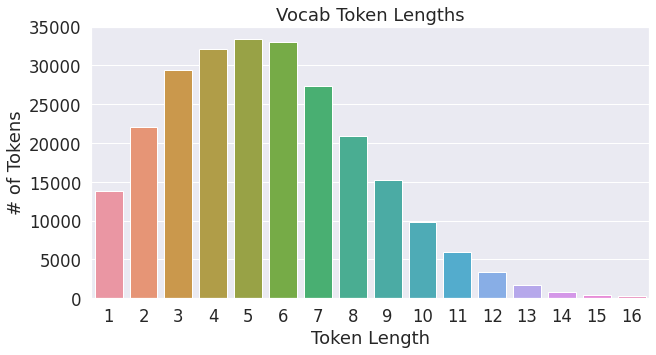

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in all_tokens]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths), '\n\n')

plt.show()

In [50]:
for token in all_tokens:
    if len(token) == 16:
        print(token)

▁Respublikasının
▁Республикасынын
▁Республикасының
................
▁características
▁unterschiedlich
▁desenvolvimento
▁государственной
▁հնարավորություն
▁responsabilidad
▁kontaktannonser
▁अन्तर्राष्ट्रिय
▁desenvolvemento
▁використовувати
▁personenbezogen
▁aproximadamente
▁caratteristiche
▁spilleautomater
▁փոփոխություններ
государственного
▁professionnelle
responsabilidade
▁ответственности
▁prostredníctvom
particulièrement
▁непосредственно
відповідальності
▁ответственность
▁предприниматель
▁przedsiębiorstw
▁государственных
lbstverständlich
▁Herausforderung
▁պատասխանատվությ
▁desenvolupament
----------------
законодательства
▁Veranstaltungen
▁particolarmente
▁correspondiente
▁профессионально
▁internacionales
відповідальність
wissenschaftlich
▁Universitetinin
▁կազմակերպության
▁internationalen
▁տեղեկություններ
eneralforsamling
▁Հանրապետություն
▁հայտարարություն
বিশ্ববিদ্যালয়ের
verantwoordelijk
ถานที่ท่องเที่ยว
onfidențialitate
▁texnologiyalari
▁responsabilitat
persoonsgegevens
▁definitivamen

Let's look at just the subwords.

### English Words

In [51]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
english_tokens = []

print('Checking all tokens against WordNet to find the English ones...')

# For all of the tokens...
for token in all_tokens:
    
    # Only check whole words, which will start with an underscore.
    if token[0] == '▁':
        
        # Check to see if the token is in wordnet.
        if wordnet.synsets(token[1:]):
            # If it is, assume it's English.
            english_tokens.append(token[1:])

print(' DONE.')

num_eng = len(english_tokens)
prcnt_eng = num_eng / len(all_tokens)

print('\n{:,} of {:,} words ({:.0%}) were recognized by WordNet'.format(num_eng, len(all_tokens), prcnt_eng))

Checking all tokens against WordNet to find the English ones...
 DONE.

11,396 of 250,002 words (5%) were recognized by WordNet


In [53]:
import random

# Check out 10 random English tokens.
for i in range(0, 10):
    print(random.choice(english_tokens))

destruction
Gan
Winner
Recovery
reeks
tempos
pali
promote
Usa
insulin


You can use the following to look up the WordNet definition(s) if you see something weird. 

In [54]:
wordnet.synsets("MASA")[0].definition()

'an independent group of closely related Chadic languages spoken in the area between the Biu-Mandara and East Chadic languages'

### Whole Words vs. Subwords

In [55]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in all_tokens:
    
    # If it's a subword...
    if not token[0] == '▁':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the underscore)
        length = len(token) - 1

        # Record the lengths.        
        subword_lengths.append(length)


How many subword tokens are there vs. the full vocab?

In [56]:
vocab_size = len(all_tokens)

# Calculate the percentage of words that don't have a leading underscore.
prcnt = float(num_subwords) / vocab_size
print('Number of subwords: {:,} of {:,} ({:.0%})'.format(num_subwords, vocab_size, prcnt))


Number of subwords: 95,373 of 250,002 (38%)


Plot the subword lengths.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


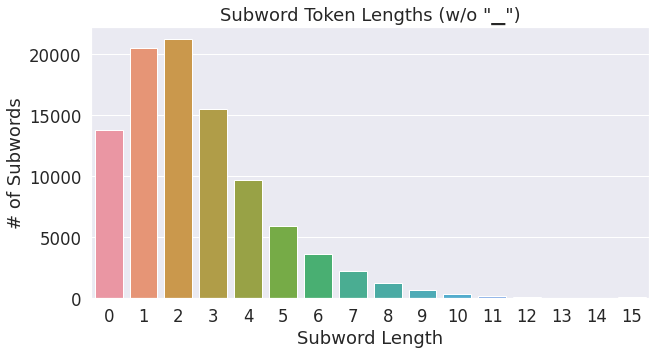

In [57]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "▁")')
plt.xlabel('Subword Length')
plt.ylabel('# of Subwords')
plt.show()

### Misspellings

In [58]:
'▁misspelled' in all_tokens # Right

False

In [59]:
'▁mispelled' in all_tokens # Wrong

False

In [60]:
'▁government' in all_tokens # Right

True

In [61]:
'▁goverment' in all_tokens # Wrong

False

In [62]:
'▁beginning' in all_tokens # Right

True

In [63]:
'▁begining' in all_tokens # Wrong

False

In [64]:
'▁separate' in all_tokens # Right

True

In [65]:
'▁seperate' in all_tokens # Wrong

False

What about contractions?

In [66]:
"▁can't" in all_tokens

False

In [67]:
"▁cant" in all_tokens

True

### Names



In [68]:
!pip install wget

In [69]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names (1).txt'

In [70]:
# Read them in.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decode the names, convert to lowercase, and strip newlines.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: thorne


In [ ]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if ('▁' + name) in all_tokens:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))